In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster, datasets, metrics
#Importing PCA
from sklearn.decomposition import PCA

In [132]:
# loading the countries data
data = pd.read_csv("https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [133]:
data.shape # has 167 rows and 10 columns

(167, 10)

In [154]:
data.info() # there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
 10  Category    167 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 14.5+ KB


In [ ]:
data.country.nunique() # There are 167 countries

167

In [3]:
# description of columns for countries data
data_dictionary = pd.read_csv("https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv")
data_dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


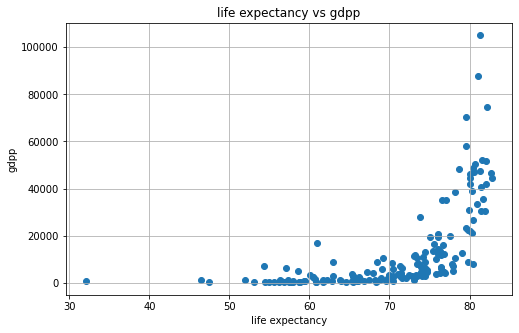

In [7]:
# plotting life expectancy vs gdpp
plt.figure(figsize=(8,5))
plt.grid(True)
plt.scatter(data.life_expec,data.gdpp)
plt.title('life expectancy vs gdpp')
plt.xlabel('life expectancy')
plt.ylabel('gdpp')
plt.show()

**k-means clustering with number of clusters =3**

In [134]:
# removing countries column as it's not significant for prediction

data_for_clustering = data.iloc[:,1:]
data_for_clustering.head(3)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [135]:
# K-means clustering with cluster number  = 3
km = KMeans(n_clusters=3)
km.fit(data_for_clustering) 
predictions = km.labels_
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [100]:
pd.Series(predictions).value_counts() # checking the number of countires in each cluster

1    128
0     32
2      7
dtype: int64

In [101]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data.iloc[:,1:], km.labels_)) 

Silhouette Coefficient: 0.700


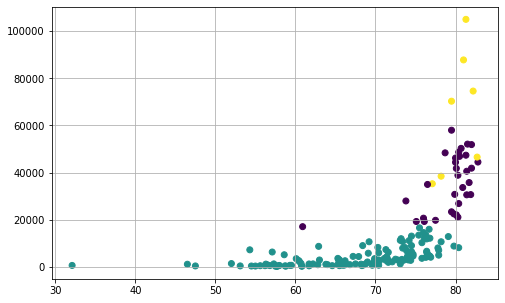

In [102]:
# plotting the life expectancy vs gdpp using predicted labels as markers
plt.figure(figsize=(8,5))
plt.grid(True)
plt.scatter(data.life_expec,data.gdpp,c=km.labels_)
plt.show()

In [ ]:
# There are 3 clusters but the cluster boundaries are not clear and some data points in green and purple clusters are mixed, similarly some yellow data points are in purple cluster

In [136]:
data['predicted_class']  = predictions # adding new columns with predicted labels to original data frame
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,predicted_class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [137]:
class_0 = data[data['predicted_class'] == 0]
class_0.describe().loc['mean']

child_mort           47.389844
exports              35.865617
health                6.332031
imports              45.921609
income             8569.242188
inflation             8.957648
life_expec           67.873437
total_fer             3.263359
gdpp               4438.390625
predicted_class       0.000000
Name: mean, dtype: float64

In [138]:
class_0.describe().loc['mean'][['income','gdpp']]

income    8569.242188
gdpp      4438.390625
Name: mean, dtype: float64

In [140]:
class_1= data[data['predicted_class'] == 1]
class_1.describe().loc['mean'][['income','gdpp']]

income    37621.875
gdpp      35587.500
Name: mean, dtype: float64

In [141]:
class_2= data[data['predicted_class'] == 2]
class_2.describe().loc['mean'][['income','gdpp']]

income    80342.857143
gdpp      65442.857143
Name: mean, dtype: float64

In [ ]:
# The class 2 has highest gdpp and income among three classes hence this class is Developed conutries.
# The class 1 has high gdp and income compared to class 1 so this is developing countries class.
# Class 0 has low income and gdpp so this is under-developing counties class.

In [139]:
print("Number of under-developing countries: ",len(class_0))

Under_Developing_Countries = list(class_0['country'])
Under_Developing_Countries

Number of under-developing countries:  128


['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'M

In [142]:
print("Number of developing countries: ",len(class_1))

Number of developing countries:  32


In [143]:
Developing_Countries = list(class_1['country'])
Developing_Countries

['Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Belgium',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Equatorial Guinea',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Oman',
 'Portugal',
 'Saudi Arabia',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [144]:
print("Number of developed countries: ",len(class_2))
Developed_Countries = list(class_2['country'])
Developed_Countries

Number of developed countries:  7


['Brunei',
 'Kuwait',
 'Luxembourg',
 'Norway',
 'Qatar',
 'Singapore',
 'Switzerland']

**PCA**

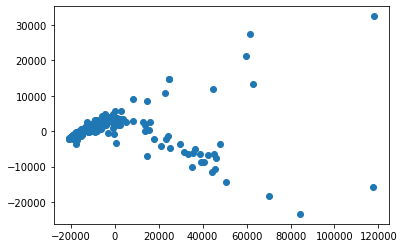

In [112]:
# Using PCA to see if it generates clear clusters

#Intializing PCA object with 3 components 
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data_for_clustering)


#plotting first 2 components
plt.scatter(X_pca[:,0],X_pca[:,1])

In [113]:
#Clustering using the prinicipal components 
km_pca=cluster.KMeans(n_clusters=3)
km_pca.fit(X_pca)
pca_predictions = km_pca.labels_
pd.Series(pca_predictions).value_counts()

1    128
2     32
0      7
dtype: int64

Text(0, 0.5, 'PC2')

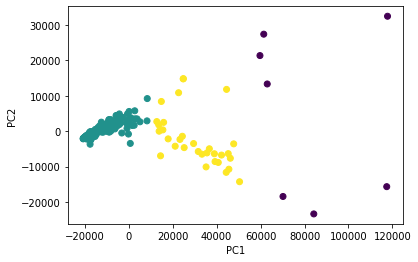

In [114]:
#Visualising the clusters generated with labels generated
plt.scatter(X_pca[:,0],X_pca[:,1],c=km_pca.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [115]:
countries_df = data.copy()
countries_df['predicted_class']  = pca_predictions
countries_df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,predicted_class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1


In [116]:
countries_df.predicted_class.value_counts()

1    128
2     32
0      7
Name: predicted_class, dtype: int64

In [117]:
class_0 = data[data['predicted_class'] == 0]
class_0.describe().loc['mean'][['income','gdpp']]

income    37621.875
gdpp      35587.500
Name: mean, dtype: float64

In [118]:
class_1= data[data['predicted_class'] == 1]
class_1.describe().loc['mean'][['income','gdpp']]

income    8569.242188
gdpp      4438.390625
Name: mean, dtype: float64

In [119]:
class_2= data[data['predicted_class'] == 2]
class_2.describe().loc['mean'][['income','gdpp']]

income    80342.857143
gdpp      65442.857143
Name: mean, dtype: float64

In [120]:
# The results of performing with or without pca remained same

In [145]:
# The final data frame with countires categorise into 3 clusters based on gdpp and income is given below:

data.predicted_class = data.predicted_class.map({1:'Developing Country',0:'Under-Developing-Country',2:'Developed Country'})

In [146]:
data['Category'] = data['predicted_class'] 
data.drop(columns='predicted_class',inplace=True)
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Category
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Under-Developing-Country
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Under-Developing-Country
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Under-Developing-Country
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Under-Developing-Country
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Under-Developing-Country
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Under-Developing-Country
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Under-Developing-Country
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Under-Developing-Country
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Under-Developing-Country


In [153]:
data.groupby(['Category'])[['income','gdpp']].mean()

,income,gdpp
Category,,
Developed Country,80342.857143,65442.857143
Developing Country,37621.875000,35587.500000
Under-Developing-Country,8569.242188,4438.390625


In [150]:
data.sort_values(by='Category')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Category
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,Developed Country
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,Developed Country
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,Developed Country
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,Developed Country
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,Developed Country
...,...,...,...,...,...,...,...,...,...,...,...
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.970,55.6,5.05,547,Under-Developing-Country
65,Guyana,37.6,51.4,5.38,79.1,5840,5.730,65.5,2.65,3040,Under-Developing-Country
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662,Under-Developing-Country
93,Madagascar,62.2,25.0,3.77,43.0,1390,8.790,60.8,4.60,413,Under-Developing-Country
